In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('german_credit_data.csv')

In [6]:
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [7]:
dataset.dropna(subset=['Saving accounts'], inplace=True)

In [8]:
dataset.dropna(subset=['Checking account'], inplace=True)

In [13]:
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
7,7,35,male,3,rent,little,moderate,6948,36,car
9,9,28,male,3,own,little,moderate,5234,30,car


In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [18]:
dataset['Sex'] = le.fit_transform(dataset['Sex'].astype('str'))
dataset['Housing'] = le.fit_transform(dataset['Housing'].astype('str'))
dataset['Checking account'] = le.fit_transform(dataset['Checking account'].astype('str'))
dataset['Purpose'] = le.fit_transform(dataset['Purpose'].astype('str'))
dataset['Saving accounts'] = le.fit_transform(dataset['Saving accounts'].astype('str'))
dataset.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,0,2,1,0,1,5951,48,5
3,3,45,1,2,0,0,0,7882,42,4
4,4,53,1,2,0,0,0,4870,24,1
7,7,35,1,3,2,0,1,6948,36,1
9,9,28,1,3,1,0,1,5234,30,1


<Figure size 432x288 with 0 Axes>

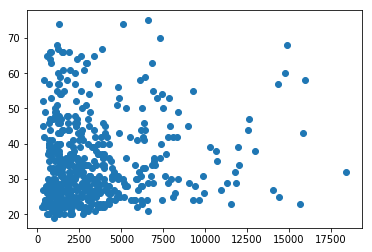

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(dataset['Credit amount'],dataset["Age"])
plt.figure()

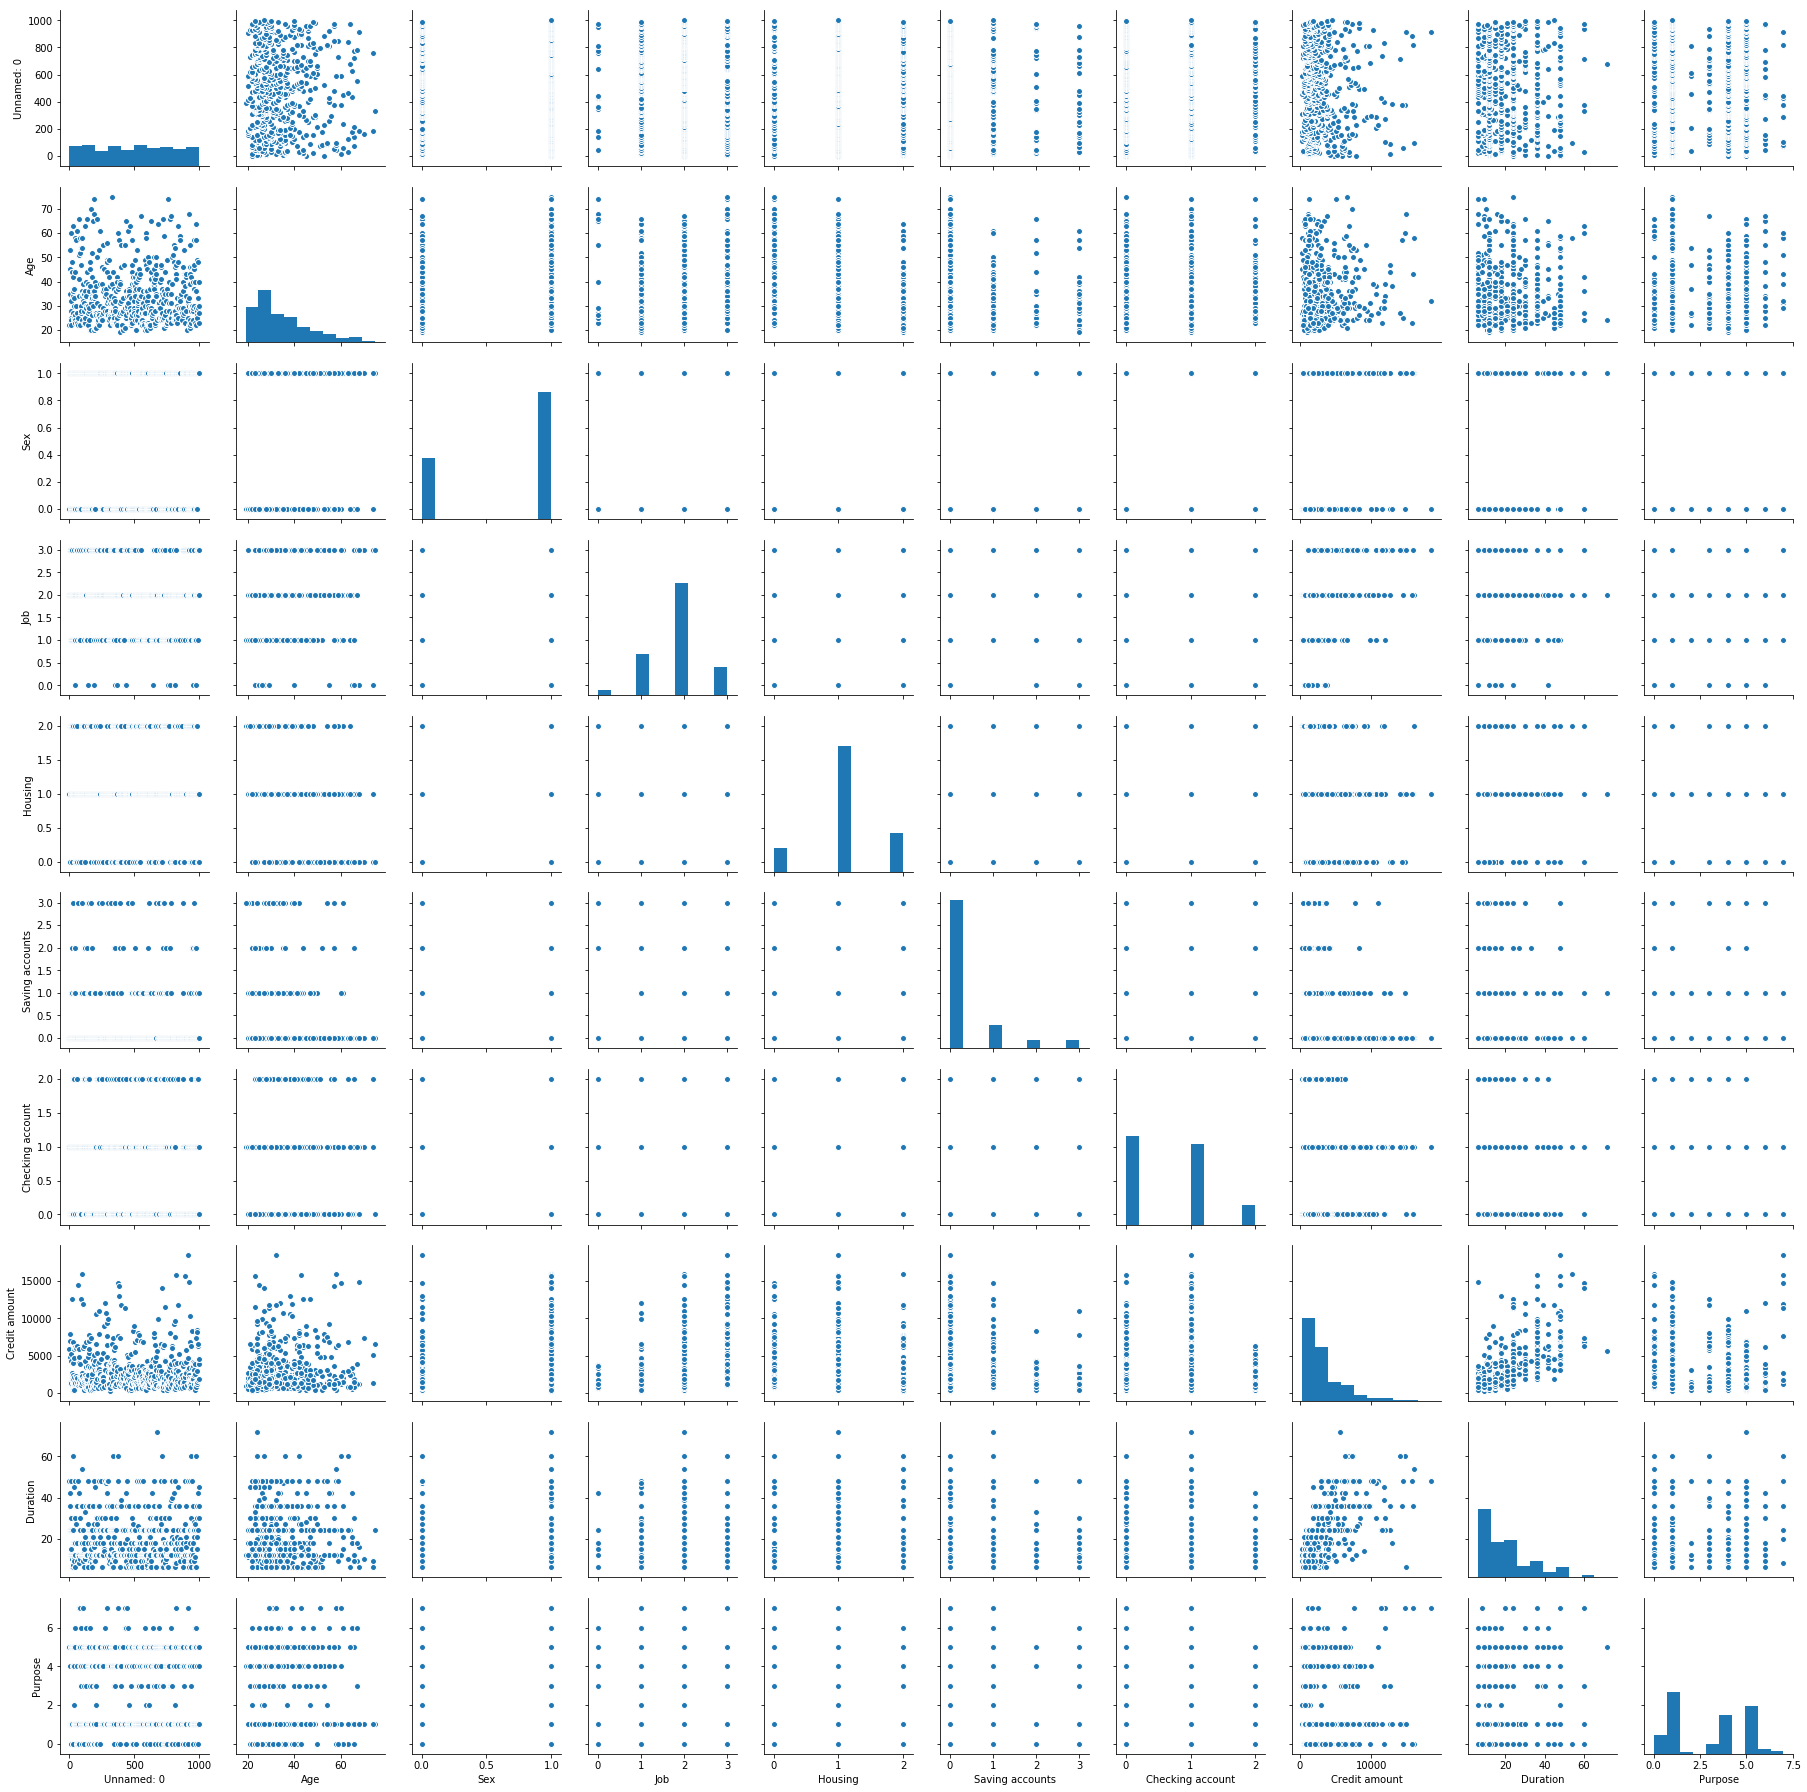

In [22]:
sns.pairplot(dataset)

<Figure size 432x288 with 0 Axes>

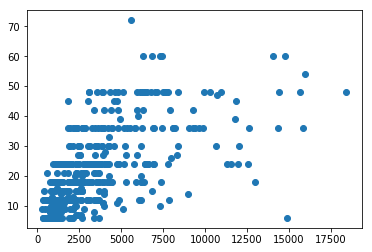

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(dataset['Credit amount'],dataset["Duration"])
plt.figure()

<Figure size 432x288 with 0 Axes>

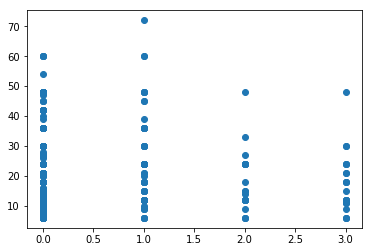

<Figure size 432x288 with 0 Axes>

In [24]:
plt.scatter(dataset['Saving accounts'],dataset["Duration"])
plt.figure()

In [25]:
#RESULTS

#1. People from Age 23 to 32 are the target customer and the amount can be in range 2000 to 5000 <currency>.
#2. Offers for car loan and radio loan can pick up more customers or lenders.
#3. Short term credit with credit range 2000 t0 5000 yield maximum customer and profits.

In [26]:
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA; 
from sklearn.preprocessing import normalize;
y = KMeans().fit_predict(dataset)
X_norm = normalize(dataset);
y_PCA = PCA(n_components=2).fit_transform(X_norm,2);
y_PCA.shape

(522, 2)

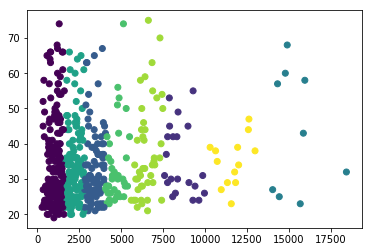

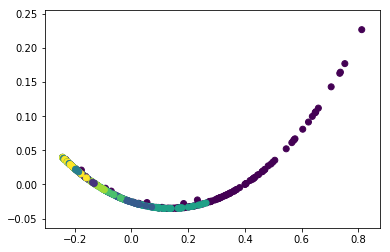

In [27]:
plt.scatter(dataset['Credit amount'],dataset['Age'],c=y)
plt.figure()
plt.scatter(y_PCA[:,0],y_PCA[:,1],c=y)